## Análise dos Dados

Autor: João Vitor F. França

Este notebook tem como objetivo a análise dos dados propostos pela T10, como um case para a seleção de novos membros.

Os dados em questão tratam da campanha de marketing de uma instituição bancária, e com este notebook busca-se interpretar estas informações para prover insights aos stakeholders, possibilitando a melhoria das próximas campanhas.

Os principais pontos da análise são os seguintes:

- Exploração uni e multivariada
- Entendimento do comportamento estatístico das variáveis
- Busca pelas características mais relevantes para a aderência dos clientes
- Elaboração de um plano de ação para as próximas campanhas

In [1]:
"""
Importando as bibliotecas que serão utilizadas na análise
"""
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sns.set();

%matplotlib inline

In [215]:
"""
Recuperação da base de dados
"""
data = pd.read_csv('../data/campaigns.csv')
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [218]:
"""
Exclusão do índice antigo
"""
data.drop(columns='Unnamed: 0', inplace=True)

In [4]:
"""
Buscando informações iniciais sobre os tipos de dados
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40690 entries, 0 to 40689
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40690 non-null  int64 
 1   job        40690 non-null  object
 2   marital    40690 non-null  object
 3   education  40690 non-null  object
 4   default    40690 non-null  object
 5   balance    40690 non-null  int64 
 6   housing    40690 non-null  object
 7   loan       40690 non-null  object
 8   contact    40690 non-null  object
 9   day        40690 non-null  int64 
 10  month      40690 non-null  object
 11  duration   40690 non-null  int64 
 12  campaign   40690 non-null  int64 
 13  pdays      40690 non-null  int64 
 14  previous   40690 non-null  int64 
 15  poutcome   40690 non-null  object
 16  y          40690 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.3+ MB


**Comentário:** Percebe-se que a base não possui valores faltantes, por isso não será um ponto trabalhado nesta análise

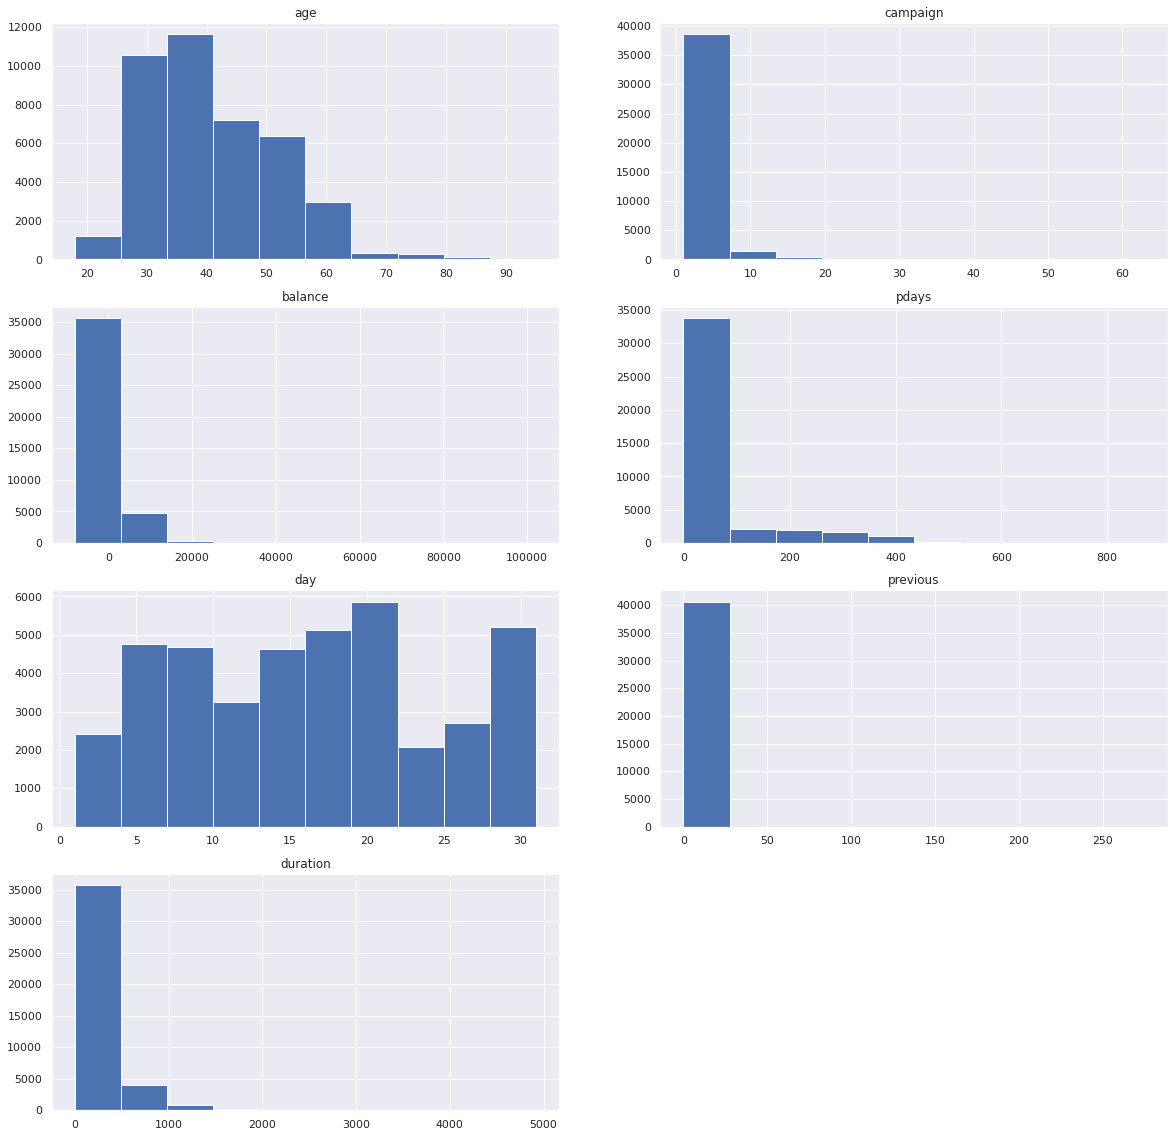

In [5]:
"""
Plotando o histograma das colunas numéricas, para um entendimento
preliminar sobre a distribuição dos dados
"""
numeric_columns = data.select_dtypes(include='int').columns

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
for i, column in enumerate(numeric_columns):
    index_row = i % 4
    index_column = i // 4
    axes[index_row, index_column].hist(data[column])
    axes[index_row, index_column].set_title(column)
fig.delaxes(axes[3,1])

**Comentário:** Percebe-se que os dados não se comportam como distribuição normal e demonstram um skew positivo

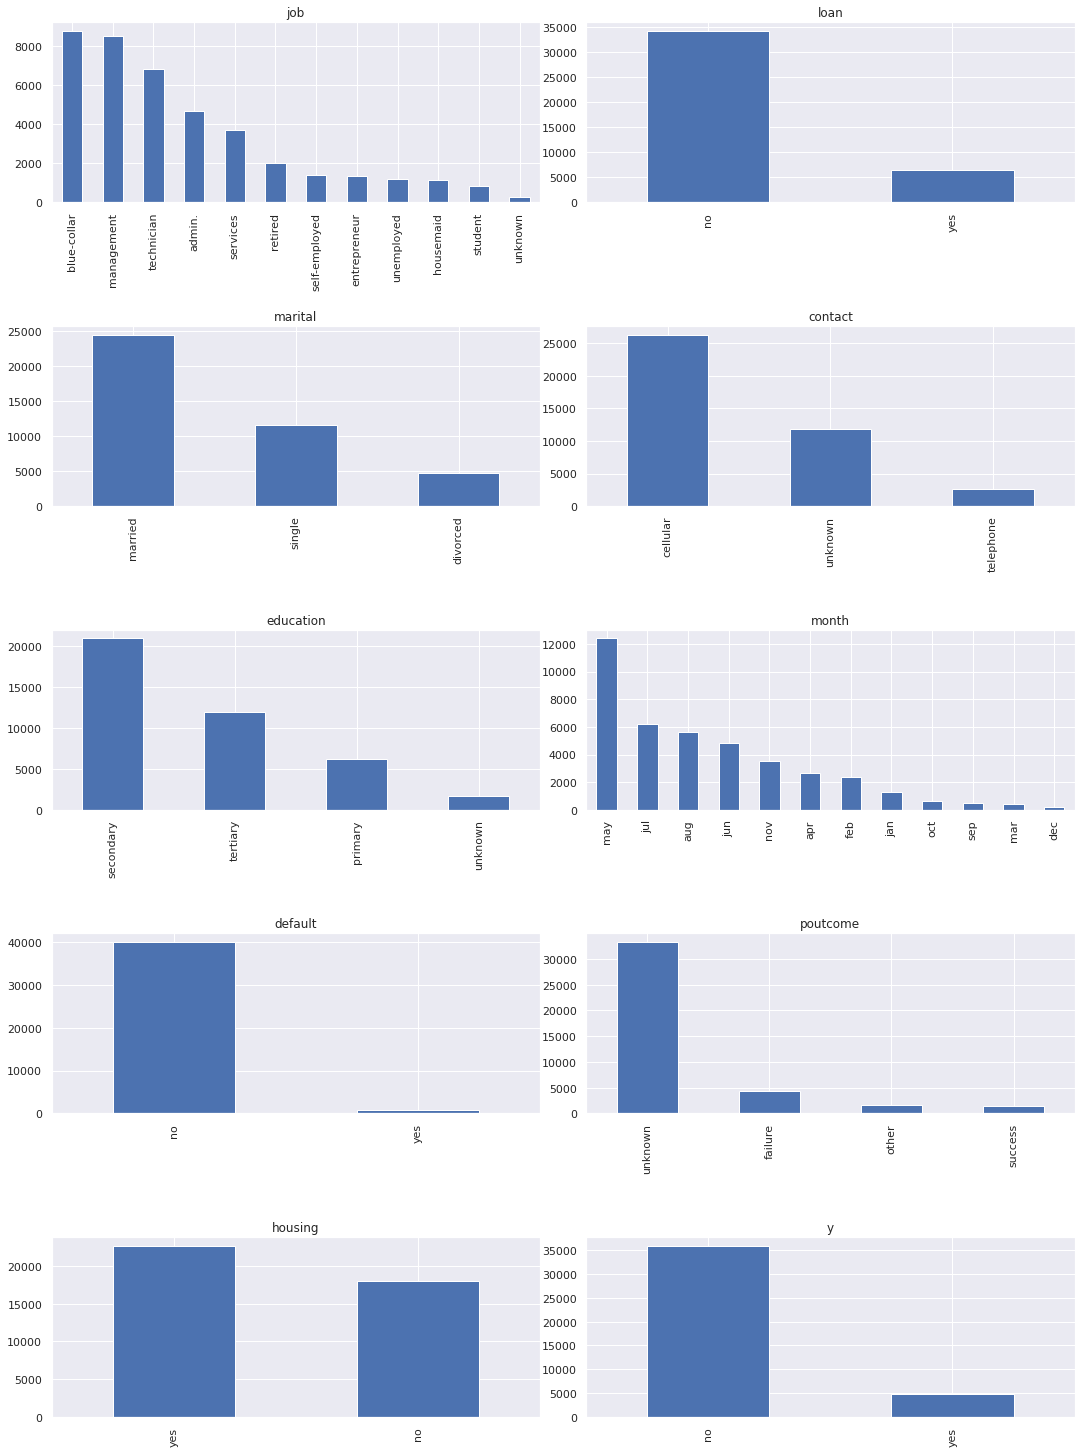

In [40]:
"""
Plotando o histograma das colunas categóricas, para um entendimento
preliminar sobre a distribuição dos dados
"""
numeric_columns = data.select_dtypes(include='object').columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
fig.tight_layout(h_pad=10.0)

for i, column in enumerate(numeric_columns):
    index_row = i % 5
    index_column = i // 5
    fig.add_subplot(data[column].value_counts().plot.bar(ax=axes[index_row, index_column], title=column))

**Comentário:** Com os gráficos das variáveis categóricas podemos compreender um pouco sobre a campanha, como por exemplo, a campanha foi direcionada sobretudo para pessoas que trabalham como **blue-collar**, **gerentes** e **técnicos**, que são **casados**, com **educação secundária**, que **não possuem empréstimo pessoal** mas **possue empréstimo referente à sua moradia**. Além disso, a principal forma de contato foi **pelo celular** e **no mês de maio** a empresa realizou o **maior esforço** para alcançar os clientes.

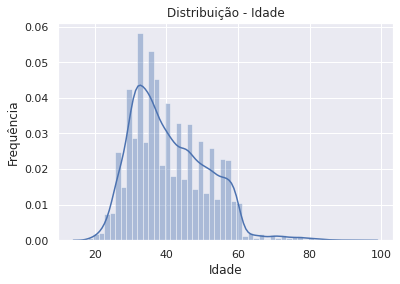

In [38]:
"""
Analisando a variável idade
"""
plt.ylabel("Frequência")
plt.title("Distribuição - Idade")
sns.distplot(data['age'], axlabel='Idade');

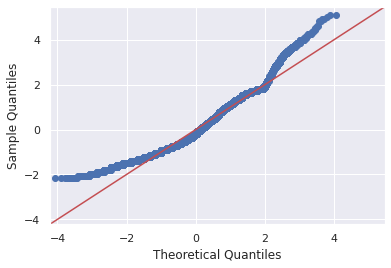

In [42]:
"""
Verificando sua normalidade
"""
sm.qqplot(data['age'], fit=True, line="45");

In [9]:
"""
Agrupandos as idades para melhor visualização
"""
data['age_binned'] = pd.cut(data['age'], bins=[18,30,40,50,60,70,95], labels=["18-30", "30-40", "40-50", "50-60", "60-70", "70-95"])
data['age_binned'].value_counts()

30-40    15892
40-50    10149
50-60     7230
18-30     6355
60-70      612
70-95      440
Name: age_binned, dtype: int64

In [45]:
def taxa_conversao(data, column):
    """
    Função para cálculo da taxa de conversão de uma coluna.
    
    :data: <pandas.DataFrame> base de dados.
    :column: <string> coluna para o cálculo.
    
    :return: <pandas.DataFrame> frame de dados com a taxa de conversão.
    """
    df = pd.DataFrame({'Total': data[column].value_counts(),
                       'Total Conversão': data.loc[data['y'] == 'yes', column].value_counts()})
    df['Taxa de Conversão'] = df['Total Conversão'] / df['Total']
    
    return df

In [46]:
"""
Verificando a taxa de retenção para cada grupo
"""
age = taxa_conversao(data, 'age_binned')
age.sort_values('Taxa de Conversão', ascending=False)

,Total,Total Conversão,Taxa de Conversão
70-95,440,201,0.456818
60-70,612,248,0.405229
18-30,6355,1041,0.163808
30-40,15892,1634,0.102819
50-60,7230,735,0.101660
40-50,10149,921,0.090748


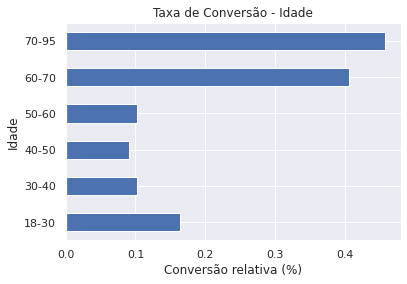

In [33]:
"""
Plotando a taxa de conversão para melhor visualização
"""
plt.xlabel("Conversão relativa (%)")
plt.ylabel("Idade")
age['Taxa de Conversão'].plot(kind='barh', title='Taxa de Conversão - Idade');

**Comentário:** Os grupos de maior retenção (Porcentagem de conversão em termos relativos) são pessoas **acima de 60 anos** e **jovens até 30 anos**. Entretando, como pudemos perceber com a distribuição da variável, estes foram os grupos menos buscados pela empresa

In [47]:
"""
Verificando a taxa de retenção para ocupação
"""
job = taxa_conversao(data, 'job')
job.sort_values('Taxa de Conversão', ascending=False)

,Total,Total Conversão,Taxa de Conversão
student,848,247,0.291274
retired,2027,467,0.230390
unemployed,1193,185,0.155071
management,8504,1178,0.138523
admin.,4661,578,0.124008
unknown,254,31,0.122047
self-employed,1427,172,0.120533
technician,6818,753,0.110443
services,3725,331,0.088859
housemaid,1125,95,0.084444


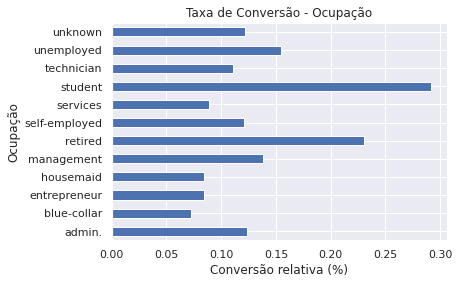

In [48]:
"""
Plotando a taxa de conversão para melhor visualização
"""
plt.xlabel("Conversão relativa (%)")
plt.ylabel("Ocupação")
job['Taxa de Conversão'].plot(kind='barh', title='Taxa de Conversão - Ocupação');

**Comentário:** Percebe-se que as ocupações com maior retenção foram de **estudantes** e **aposentad@s**, confirmando o que pode ser visto pela variável de idade

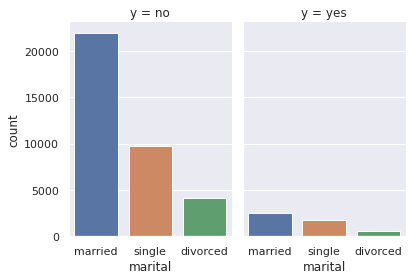

In [56]:
"""
Catplot para analisar o status matrimonial em relação à conversão
"""
sns.catplot(x="marital", col="y",
            data=data, kind="count",
            height=4, aspect=.7);

In [57]:
"""
Verificando a taxa de retenção para ocupação
"""
marital = taxa_conversao(data, 'marital')
marital.sort_values('Taxa de Conversão', ascending=False)

,Total,Total Conversão,Taxa de Conversão
single,11531,1734,0.150377
divorced,4695,571,0.121619
married,24464,2482,0.101455


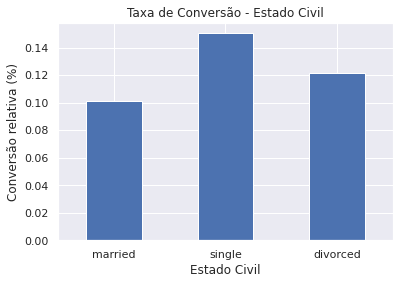

In [62]:
"""
Plotando a taxa de conversão para melhor visualização
"""
plt.xlabel("Estado Civil")
plt.ylabel("Conversão relativa (%)")
marital['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Estado Civil', rot=0);

**Comentários:** Apesar da maior quantidade das pessoas que foram retidas pela campanha serem casadas, o grupo mais convertido foi o de pessoas **solteiras**. 

In [67]:
"""
Verificando a taxa de retenção para educação
"""
marital = taxa_conversao(data, 'education')
marital.sort_values('Taxa de Conversão', ascending=False)

,Total,Total Conversão,Taxa de Conversão
tertiary,11917,1794,0.150541
unknown,1669,232,0.139005
secondary,20951,2234,0.106630
primary,6153,527,0.085649


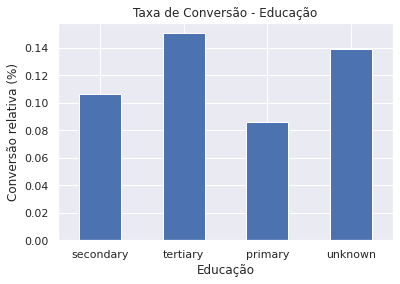

In [69]:
"""
Plotando a taxa de conversão para melhor visualização
"""
plt.xlabel("Educação")
plt.ylabel("Conversão relativa (%)")
marital['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Educação', rot=0);

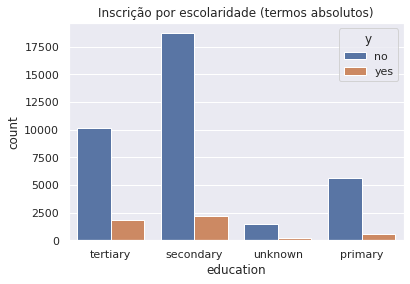

In [72]:
"""
Plotando a quantidade de pessoas que se inscreveram ao 
produto em termos absolutos, baseado na escolaridade
"""
plt.title("Inscrição por escolaridade (termos absolutos)")
sns.countplot(x="education", hue="y", data=data);

**Comentários:** A escolaridade segue um padrão semelhante ao do estado civil, apesar do maior número de convertidos ser do grupo com segundo grau, **o grupo com maior aderência é o com terceiro grau**

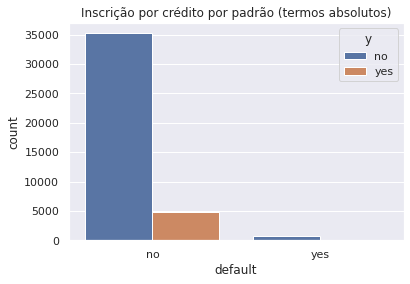

In [77]:
"""
Plotando a quantidade de pessoas que se inscreveram ao 
produto em termos absolutos, baseado na coluna 'default'
"""
plt.title("Inscrição por crédito por padrão (termos absolutos)")
sns.countplot(x="default", hue="y", data=data);

**Comentários:** Existe um desbalanceamento muito grande nesta coluna, por isso não parece muito interessante para a aderência dos clientes

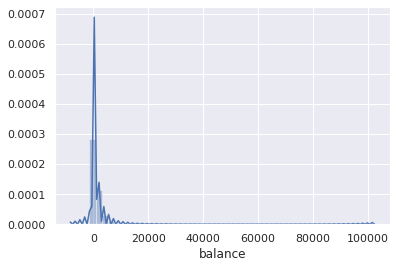

In [80]:
"""
Analisando a distribuição da coluna balance
"""
sns.distplot(data['balance']);

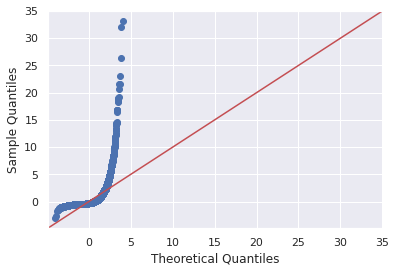

In [90]:
"""
Verificando sua normalidade
"""
sm.qqplot(data['balance'], fit=True, line="45");

**Comentários:** Pelo gráfico podemos perceber de modo empírico que a coluna *balance* não possui uma distribuição normal, apresenta viés para a esquerda e se mostra como uma curva leptocúrtica

In [89]:
"""
Buscando distribuição dos registros com valores
abaixo de zero na coluna balance
"""
data.loc[data['balance'] < 0, 'y'].value_counts()

no     3201
yes     190
Name: y, dtype: int64

**Comentários:** Optarei por manter estes valores, para não perder indivíduos da classe '1'

In [92]:
data['balance'].describe()

count     40690.000000
mean       1359.697518
std        3034.248783
min       -8019.000000
25%          74.000000
50%         451.000000
75%        1423.000000
max      102127.000000
Name: balance, dtype: float64

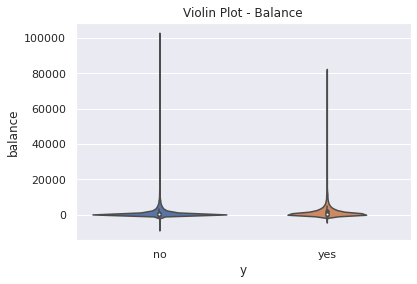

In [103]:
"""
Utilizando violion plot para intuição
inicial da coluna balance
"""
plt.title("Violin Plot - Balance")
sns.violinplot(x="y", y="balance", data=data);

In [94]:
"""
Discretizando a variável balance para melhor
interpretação
"""
data['balance_cut'] = pd.cut(data['balance'], bins=[0,100,250,500,1000,5000,10000,50000,102127], labels=["0-100", "100-250", "250-500", "500-1000", "1000-5000", "5000-10000", "10000-50000", "50000-"])
data['balance_cut'].value_counts()

1000-5000      10618
500-1000        6257
250-500         5582
0-100           4651
100-250         4488
5000-10000      1829
10000-50000      718
50000-            17
Name: balance_cut, dtype: int64

In [97]:
"""
Verificando a taxa de retenção para balance
"""
balance = taxa_conversao(data, 'balance_cut')
balance.sort_values('Taxa de Conversão', ascending=False)

,Total,Total Conversão,Taxa de Conversão
50000-,17,3,0.176471
10000-50000,718,120,0.167131
5000-10000,1829,289,0.158010
1000-5000,10618,1614,0.152006
500-1000,6257,787,0.125779
250-500,5582,653,0.116983
100-250,4488,495,0.110294
0-100,4651,375,0.080628


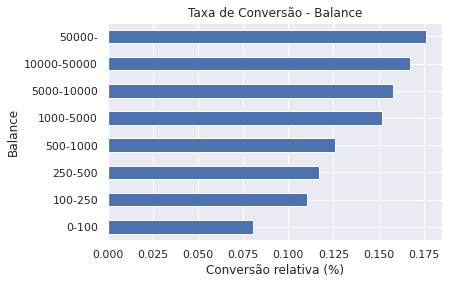

In [99]:
"""
Plotando a taxa de conversão para melhor visualização
"""
plt.xlabel("Conversão relativa (%)")
plt.ylabel("Balance")
balance['Taxa de Conversão'].plot(kind='barh', title='Taxa de Conversão - Balance', rot=0);

**Comentários:** Podemos perceber que como o aumento do *income* anual, aumente a taxa de adesão. Com isso, percebe-se que o grupo de maior retenção possui um balanço anual maior

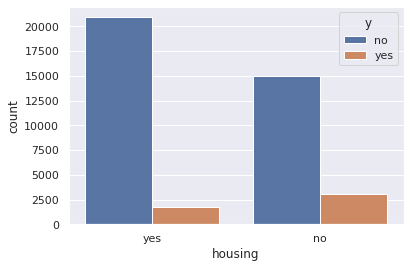

In [119]:
"""
Plotando a quantidade de pessoas que se inscreveram ao 
produto em termos absolutos, baseado na coluna 'housing'
"""
plt.title("Inscrição por housing (termos absolutos)")
sns.countplot(x="housing", hue="y", data=data);

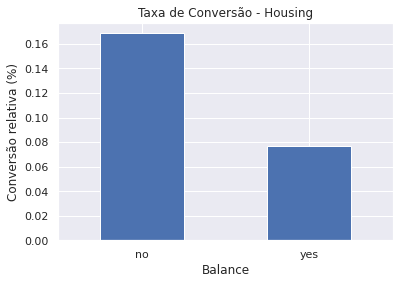

In [124]:
"""
Verificando a taxa de retenção para balance
"""
housing = taxa_conversao(data, 'housing')

plt.xlabel("Balance")
plt.ylabel("Conversão relativa (%)")

housing['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Housing', rot=0);

**Comentários:** Quanto à coluna housing, percebe-se que apesar da maioria dos clientes possuirem empréstimo de moradia, o grupo de maior retenção não possui, o que indica que se o cliente possui empréstimo de moradia, sua chance de se inscrever ao produto é menor.

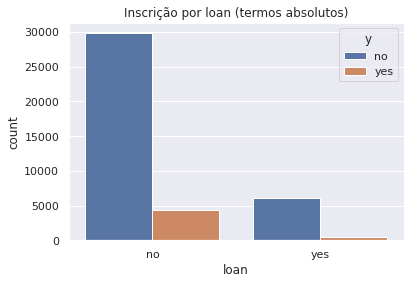

In [126]:
"""
Plotando a quantidade de pessoas que se inscreveram ao 
produto em termos absolutos, baseado na coluna 'loan'
"""
plt.title("Inscrição por loan (termos absolutos)")
sns.countplot(x="loan", hue="y", data=data);

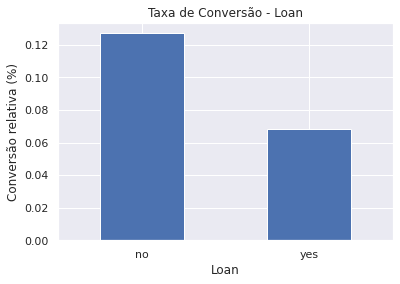

In [130]:
"""
Verificando a taxa de retenção para balance
"""
loan = taxa_conversao(data, 'loan')

plt.xlabel("Loan")
plt.ylabel("Conversão relativa (%)")

loan['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Loan', rot=0);

**Comentários:** Quantos às variáveis *loan*, pode-se apenas perceber que o grupo de maior retenção não possui empréstimo pessoal

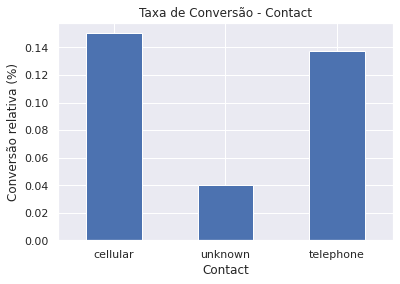

In [131]:
"""
Verificando a taxa de retenção para contact
"""
contact = taxa_conversao(data, 'contact')

plt.xlabel("Contact")
plt.ylabel("Conversão relativa (%)")

contact['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Contact', rot=0);

**Comentários:** Percebe-se que o grupo de maior retenção foi contactado por **celular**

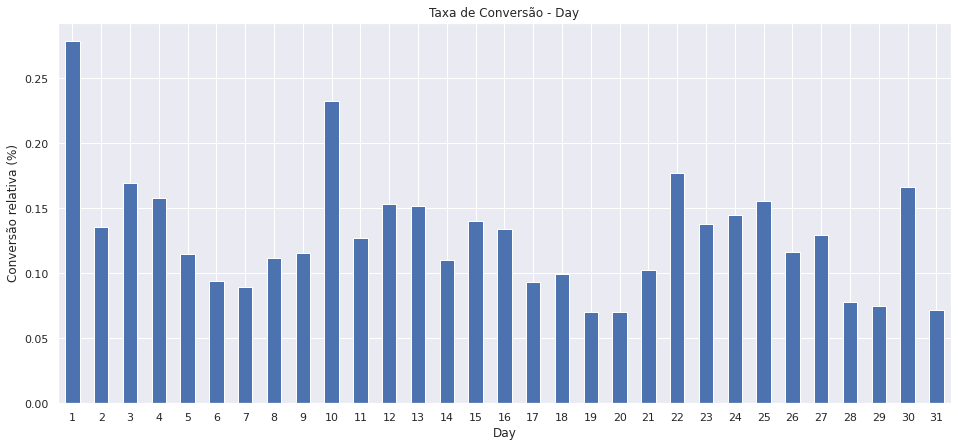

In [135]:
"""
Verificando a taxa de retenção para dia da semana de contato
"""
day = taxa_conversao(data, 'day')

fig, axes = plt.subplots(figsize=(16,7))
plt.xlabel("Day")
plt.ylabel("Conversão relativa (%)")

day['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Day', rot=0);

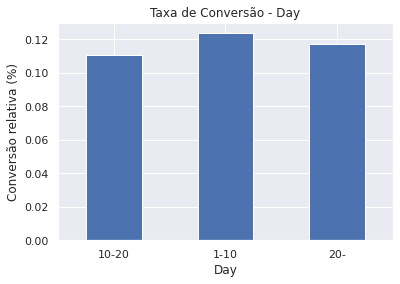

In [138]:
"""
Verificando a taxa de retenção para dia da semana de contato discretizado
"""

data['day_cut'] = pd.cut(data['day'], bins=[1,10,20,31], labels=["1-10", "10-20", "20-"]);

day = taxa_conversao(data, 'day_cut')

plt.xlabel("Day")
plt.ylabel("Conversão relativa (%)")

day['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Day', rot=0);

**Comentários:** O dia da semana do último contato não parece impactar muito na retenção do cliente

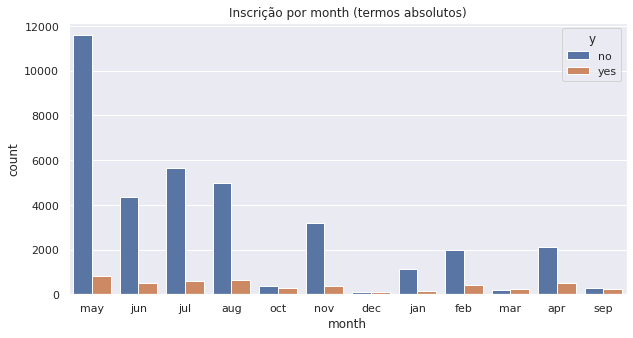

In [142]:
"""
Plotando a quantidade de pessoas que se inscreveram ao 
produto em termos absolutos, baseado na coluna 'month'
"""
fig, axes = plt.subplots(figsize=(10,5))
plt.title("Inscrição por mês (termos absolutos)")
sns.countplot(x="month", hue="y", data=data);

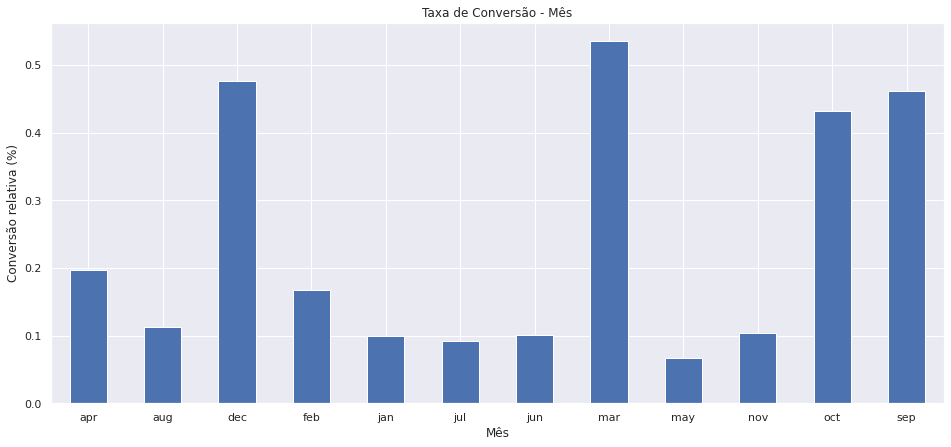

In [143]:
"""
Verificando a taxa de retenção para mês do último contato
"""
month = taxa_conversao(data, 'month')

fig, axes = plt.subplots(figsize=(16,7))
plt.xlabel("Mês")
plt.ylabel("Conversão relativa (%)")

month['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Mês', rot=0);

**Comentários:** Interessante, os meses com maiores taxas de retenção são justamente os que tiveram mesmo investidas pela empresa: **outubro**, **dezembro**, **março** e **setembro**.

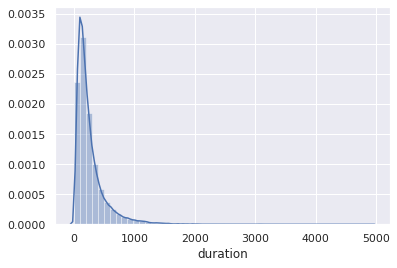

In [147]:
"""
Analisando a distribuição da coluna duração
"""
sns.distplot(data['duration']);

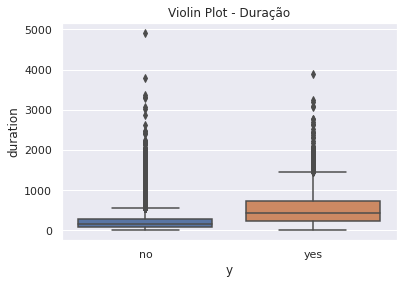

In [153]:
"""
Utilizando boxplot para intuição
inicial da coluna duração
"""
plt.title("Boxplot - Duração")
sns.boxplot(x="y", y="duration", data=data);

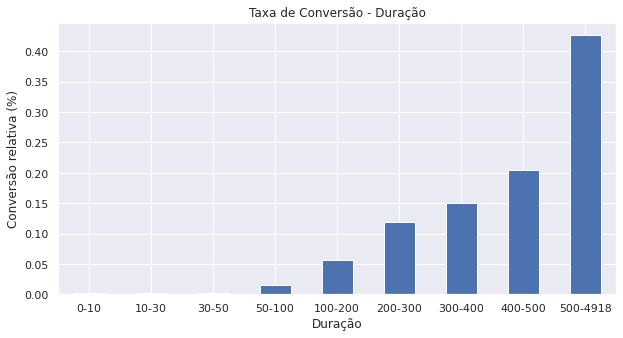

In [171]:
"""
Verificando a taxa de retenção para duração discretizada
"""

data['duration_cut'] = pd.cut(data['duration'], bins=[0,10,30,50,100,200,300,400,500,4918], labels=["0-10", "10-30", "30-50", "50-100", "100-200", "200-300","300-400","400-500","500-4918"])

duration = taxa_conversao(data, 'duration_cut')

fig, axes = plt.subplots(figsize=(10,5))
plt.xlabel("Duração")
plt.ylabel("Conversão relativa (%)")

duration['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Duração', rot=0);

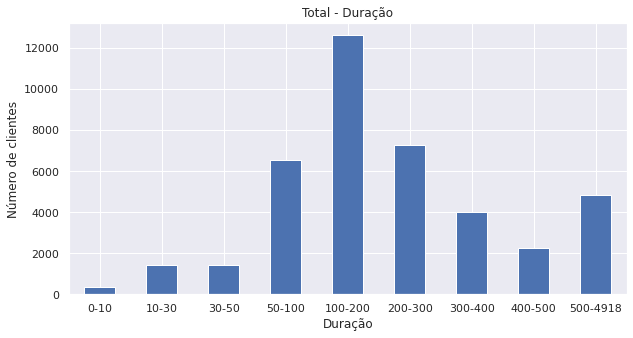

In [164]:
"""
Visualizando valores absolutos dos grupos de duração
"""

fig, axes = plt.subplots(figsize=(10,5))

plt.xlabel("Duração")
plt.ylabel("Número de clientes")
month['Total'].plot(kind='bar', title='Total - Duração', rot=0);

**Comentários:** Percebe-se que com o aumento da duração da chamada, a retenção aumenta, ou seja, a duração é um fator primordial para a adesão do cliente. Além disso, percebe-se que a maioria das ligações duram aproximadamente entre 1.5 e 4 minutos, o que parece ser um ponto chave para a decisão do cliente, sendo o ponto crítico que determina a rejeição ou o interesse do cliente.

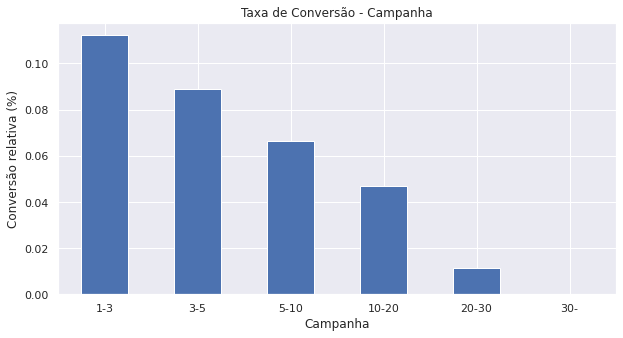

In [172]:
"""
Analisando a taxa de conversão para a o número de contatos durante a campanha
"""

data['campaign_cut'] = pd.cut(data['campaign'], bins=[1,3,5,10,20,30,63], labels=["1-3", "3-5", "5-10","10-20","20-30","30-"])

campaign = taxa_conversao(data, 'campaign_cut')

fig, axes = plt.subplots(figsize=(10,5))
plt.xlabel("Campanha")
plt.ylabel("Conversão relativa (%)")

campaign['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Campanha', rot=0);

**Comentários:** Nota-se que a **retenção diminui** à medida que o número de **contatos aumenta**, demonstrando a necessidade de diminuir o número de tentativas para cada cliente.

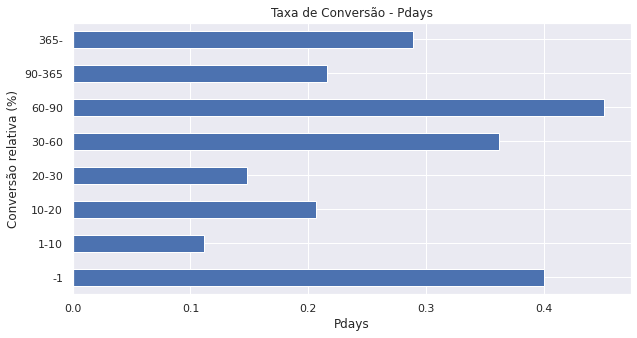

In [181]:
"""
Analisando a taxa de conversão para a o número de dias desde o último contato
"""

data['pdays_cut'] = pd.cut(data['pdays'], bins=[-1,1,10,20,30,60,90,365,871], labels=["-1", "1-10", "10-20","20-30","30-60", "60-90", "90-365", "365-"])

pdays = taxa_conversao(data, 'pdays_cut')

fig, axes = plt.subplots(figsize=(10,5))
plt.xlabel("Pdays")
plt.ylabel("Conversão relativa (%)")

pdays['Taxa de Conversão'].plot(kind='barh', title='Taxa de Conversão - Pdays', rot=0);

**Comentários:** Com a variável *pdays*, percebe-se que os grupos de retenção são para clientes que **nunca foram contactados** ou que foram contactados **há 2-3 meses atrás**.

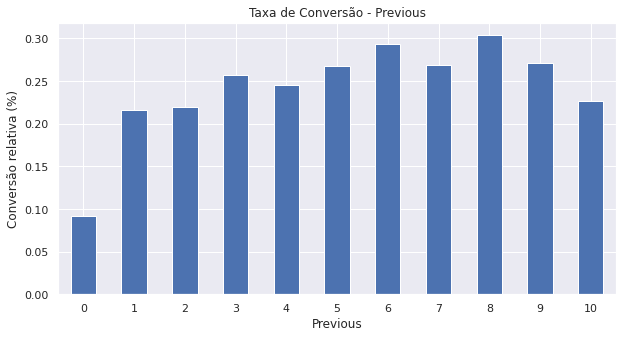

In [193]:
"""
Analisando a taxa de conversão para a o número de contatos antes da campanha
"""

data['previous_cut'] = data['previous'].apply(lambda x: 10 if x >= 10 else x)

previous = taxa_conversao(data, 'previous_cut')

fig, axes = plt.subplots(figsize=(10,5))
plt.xlabel("Previous")
plt.ylabel("Conversão relativa (%)")

previous['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Previous', rot=0);

**Comentários:** O número de contatos com o cliente antes da campanha nos mostra que clientes que já foram contactados pela empresa tendem a aceitar melhor o produto.

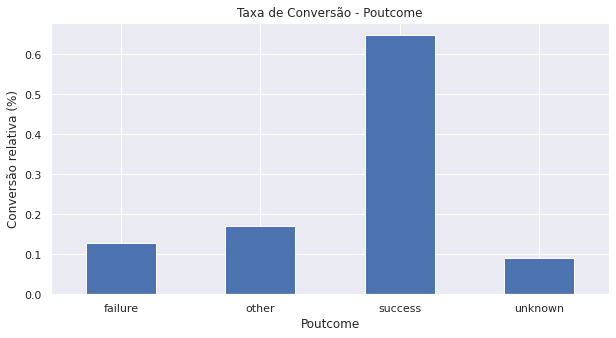

In [196]:
"""
Analisando a taxa de conversão para a o resultado da campanha
anterior
"""

poutcome = taxa_conversao(data, 'poutcome')

fig, axes = plt.subplots(figsize=(10,5))
plt.xlabel("Poutcome")
plt.ylabel("Conversão relativa (%)")

poutcome['Taxa de Conversão'].plot(kind='bar', title='Taxa de Conversão - Poutcome', rot=0);

**Comentários:** O resultado da campanha anterior parece influenciar muito na decisão do cliente, já que **a taxa de conversão do grupo que foi retido pela empresa na última campanha é muito alta**

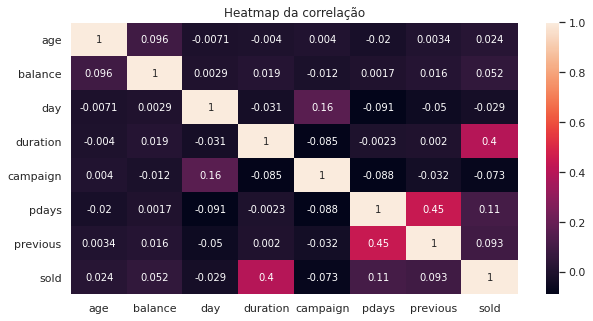

In [220]:
"""
Verificando o mapa de correlação das variáveis
"""
data['sold'] = data['y'].apply(lambda x: 0 if x == 'no' else 1)

fig, axes = plt.subplots(figsize=(10,5))
plt.title("Heatmap da correlação")
sns.heatmap(data.corr(), annot=True);

## Conclusão

Com a análise, foram percebidos alguns pontos-chave sobre a campanha:

- A campanha abordou majoritariamente pessoas entre 30 e 50 anos, entretanto, este é o grupo com menor aderência ao produto. Adicionalmente, percebe-se que quanto a idade, os grupos com maior aceitação ao produto são jovens entre 18 e 30 anos e idosos acima de 60 anos.
- Seguindo a tendência da idade, as ocupações com maior taxa de retenção são estudantes e aposentados. Entretanto, percebe-se que a empresa investiu maior parte dos seus esforços em pessoas que trabalham com gerência, técnicos e *blue-collar*
- Em relação ao estado civil, a campanha investiu em abordar clientes casados, porém percebe-se que o grupo com maior retenção é o de solteiros
- Quanto a escolaridade, o grupo com maior adesão ao produto é o de pessoas com ensino superior
- Em geral, as pessoas que aderiram o produto possuem um ganho anual elevado
- A maioria dos clientes abordados possuem empréstimo relacionado a sua habitação, no entanto, clientes que não possuem empréstimo relacionado a sua moradia são mais propensos a serem convertidos pela campanha
- O mês com o maior esforço para alcançar clientes foi maio, porém percebe-se que os meses outubro, dezembro, março e setembro foram os meses com maior retenção, e surpreendentemente, são os meses com menos pessoas abordadas
- A duração é uma característica muito importante, já que a retenção aumenta à medida que a duração aumenta. Além disso, percebe-se que a maioria das ligações duram entre 1.5 e 4 minutos aproximadamente, logo esse parece ser o ponto chave na conversa que desperta ou não o interesse do cliente
- Em relação à quantidade de contatos com o cliente durante a campanha, percebe-se que a retenção diminuição à medida que aumenta o número de contatos. Portanto, é benéfico manter o número de contatos baixo
- Os clientes que já foram abordados antes da campanha apresentam uma receptividade melhor ao produto
- O resultado de campanhas anteriores é importante para entender o adesão ou não do cliente, já que as clientes que mais compram o produto já foram convertidos em outra campanha
 
Portanto, para as próximas campanhas sugere-se o seguinte **plano de ação**:

- **Idade:** Nas próximas campanhas, a empresa deve focar seus esforços nos clientes com menos que 30 anos e mais que 60 anos
- **Ocupação:** A empresa deve direcionar seus recursos para abordar sobretudo estudantes e pessoas aposentadas
- **Ganho anual:** É recomendado que a empresa direcione a campanha para clientes com um ganho anual acima de 1000 euros
- **Empréstimo de habitação:** Recomenda-se que a empresa busque contatar sobretudo clientes que não possuem empréstimos de habitação, já que os clientes que já possuem obrigações financeiras tendem a ter uma adesão menor ao produto
- **Mês:** A adesão dos clientes parece se comportar de uma forma sazonal, por isso sugere-se que a empresa direcione a campanha sobretudo para os meses: março, setembro, outubro e dezembro
- **Duração:** É importante a empresa buscar formas para estender a ligação, já que ligações com durações mais altas possuem uma taxa de retenção maior. Sugere-se uma conversa com os vendedores para analisar quais fatores despertam mais a ateção dos clientes, fazendo com que a ligação dure mais que 4 minutos.
- **Número de contatos:** Sugere-se que a empresa evite exceder 3 contatações ao cliente, haja vista que com o aumento no número de contato a probabilidade de retenção diminui


Ao combinar todas essas estratégias e simplificar o público do mercado que a próxima campanha deve abordar, é provável que a próxima campanha de marketing do banco seja mais eficaz do que a atual.